# Reinhart-Rogoff replication

* Replication of Reinhart-Rogoff "Growth in a Time of Debt."
* Python port of R code by Thomas Herndon | Michael Ash | Robert Pollin
* http://www.peri.umass.edu/236/hash/31e2ff374b6377b2ddec04deaa6388b1/publication/566/
* Author: Vincent Arel-Bundock varel@umich.edu
* Data: https://gist.github.com/vincentarelbundock/5409893/raw/a623f2f3bae027a0e51dd01ac5b70d44d909a7b9/RR-processed.csv

In [1]:
import statsmodels.api as sm
import patsy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

RR = pd.read_csv('RR-processed.csv')

/usr/local/packages/python/2.7.14-anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Number of observations per country

In [2]:
RR.groupby('Country').size()

Country
Australia      64
Austria        62
Belgium        63
Canada         64
Denmark        56
Finland        64
France         54
Germany        59
Greece         40
Ireland        63
Italy          59
Japan          54
Netherlands    53
New Zealand    64
Norway         64
Portugal       58
Spain          42
Sweden         64
UK             64
US             64
dtype: int64

## Bins

In [3]:
bins = ["0-30%","30-60%","60-90%","Above 90%"]
RR['dgcat'] = np.digitize(RR.debtgdp, [0,30,60,90,np.inf]) - 1
RR.dgcat = [bins[x] for x in RR.dgcat]

bins = ["0-30%","30-60%","60-90%","90-120%","Above 120%"]
RR['dgcat2'] = np.digitize(RR.debtgdp, [0,30,60,90,120,np.inf]) - 1
RR.dgcat2 = [bins[x] for x in RR.dgcat2]

## Regression analysis 

In [4]:
y,X = patsy.dmatrices('dRGDP ~ dgcat', data=RR[['dRGDP', 'dgcat']].dropna())
print sm.OLS(y,X).fit().summary()

                            OLS Regression Results                            
Dep. Variable:                  dRGDP   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     18.36
Date:                Wed, 18 Mar 2020   Prob (F-statistic):           1.22e-11
Time:                        14:01:51   Log-Likelihood:                -2927.9
No. Observations:                1175   AIC:                             5864.
Df Residuals:                    1171   BIC:                             5884.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              4.1735      0

In [5]:
y2,X2 = patsy.dmatrices('dRGDP ~ dgcat2', data=RR[['dRGDP', 'dgcat2']].dropna())
print sm.OLS(y2,X2).fit().summary()

                            OLS Regression Results                            
Dep. Variable:                  dRGDP   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     14.24
Date:                Wed, 18 Mar 2020   Prob (F-statistic):           2.36e-11
Time:                        14:01:51   Log-Likelihood:                -2926.9
No. Observations:                1175   AIC:                             5864.
Df Residuals:                    1170   BIC:                             5889.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                4.1735 

## Table 3 Corrected

In [6]:
## Country-Year average by debtgdp ("correct weights")
RR.dRGDP.groupby(RR.dgcat).mean()

dgcat
0-30%        4.173523
30-60%       3.092145
60-90%       3.186575
Above 90%    2.167972
Name: dRGDP, dtype: float64

In [7]:
## Averaged Country averages by debtgdp ("equal weights")
RR.dRGDP.groupby([RR.Country, RR.dgcat]).mean().unstack()

dgcat,0-30%,30-60%,60-90%,Above 90%
Country,,,,
Australia,3.205885,4.947205,4.042175,3.774250
Austria,5.207527,3.256526,-3.824000,NaN
Belgium,NaN,4.191655,3.079868,2.566828
Canada,2.515704,3.525446,4.523574,2.956640
Denmark,3.518584,1.700034,2.391147,NaN
Finland,3.817029,2.418535,5.488887,NaN
France,5.058476,2.616159,3.019631,NaN
Germany,3.873759,0.875803,NaN,NaN
Greece,4.001282,0.340200,2.696000,2.910632


In [8]:
## Country-Year average by debtgdp ("correct weights") expanded categories
RR.dRGDP.groupby(RR.dgcat2).mean()

dgcat2
0-30%         4.173523
30-60%        3.092145
60-90%        3.186575
90-120%       2.405934
Above 120%    1.561553
Name: dRGDP, dtype: float64

In [9]:
## Averaged Country averages by debtgdp ("equal weights")
RR.dRGDP.groupby([RR.Country, RR.dgcat2]).mean().unstack()

dgcat2,0-30%,30-60%,60-90%,90-120%,Above 120%
Country,,,,,
Australia,3.205885,4.947205,4.042175,6.920201,2.987763
Austria,5.207527,3.256526,-3.824000,NaN,NaN
Belgium,NaN,4.191655,3.079868,2.702629,-0.692378
Canada,2.515704,3.525446,4.523574,4.544839,0.574341
Denmark,3.518584,1.700034,2.391147,NaN,NaN
Finland,3.817029,2.418535,5.488887,NaN,NaN
France,5.058476,2.616159,3.019631,NaN,NaN
Germany,3.873759,0.875803,NaN,NaN,NaN
Greece,4.001282,0.340200,2.696000,2.910632,NaN


## Selective treatment of early years

In [10]:
idx = (RR.Country == 'New Zealand') & (RR.Year < 1950) | (RR.Country == 'Australia') & (RR.Year < 1951) | (RR.Country == 'Canada') & (RR.Year < 1951) 
RR_selective = RR[idx == False]
RR_selective.dRGDP.groupby(RR_selective.dgcat).mean()

dgcat
0-30%        4.173523
30-60%       3.092145
60-90%       3.186575
Above 90%    1.919934
Name: dRGDP, dtype: float64

## Equal weights
## Table 3 Weights,Exclusion

In [11]:
RR_selective.mean()

Unnamed: 0    5.916408e+02
Year          1.979633e+03
Debt          1.621458e+07
RGDP          2.369173e+05
GDP           1.957611e+05
dRGDP         3.408270e+00
GDPI          5.034180e+01
GDP1          1.470725e+07
GDP2          1.824865e+07
RGDP1         1.425590e+07
RGDP2         3.072470e+07
GDPI1         5.589542e+02
GDPI2         8.690705e+01
Infl          5.632643e+00
Debt1         5.625405e+05
Debt2         1.050730e+05
Debtalt       1.006665e+07
GDP2alt       4.450790e+05
GDPalt        2.079659e+06
RGDP2alt      1.033331e+05
debtgdp       4.530375e+01
GDP3          7.689113e+04
GNI           5.156239e+08
lRGDP         2.351587e+05
lRGDP1        1.405853e+07
lRGDP2        3.047113e+07
dtype: float64

## Correct weights
## Table 3 Selective years exclusion

In [12]:
RR_selective.dRGDP.groupby([RR_selective.Country, RR_selective.dgcat]).mean().unstack()

dgcat,0-30%,30-60%,60-90%,Above 90%
Country,,,,
Australia,3.205885,4.947205,4.042175,NaN
Austria,5.207527,3.256526,-3.824000,NaN
Belgium,NaN,4.191655,3.079868,2.566828
Canada,2.515704,3.525446,4.523574,NaN
Denmark,3.518584,1.700034,2.391147,NaN
Finland,3.817029,2.418535,5.488887,NaN
France,5.058476,2.616159,3.019631,NaN
Germany,3.873759,0.875803,NaN,NaN
Greece,4.001282,0.340200,2.696000,2.910632


## And dropping because of spreadsheet error

In [13]:
drop = ["Australia","Austria","Belgium","Canada","Denmark"]
idx = [False if x in drop else True for x in RR_selective.Country]
RR_selective_spreadsheet = RR_selective[idx]
RR_selective_spreadsheet.dRGDP.groupby(RR.dgcat).mean()

dgcat
0-30%        4.236391
30-60%       2.958902
60-90%       3.160164
Above 90%    1.692155
Name: dRGDP, dtype: float64

## New Zealand transcription error

In [14]:
RR_selective_spreadsheet_transcription = RR_selective_spreadsheet.copy()
RR_selective_spreadsheet_transcription.RGDP[RR_selective_spreadsheet_transcription.Country=='New Zealand'] = -7.9
RR_selective_spreadsheet_transcription.dRGDP.groupby(RR.dgcat).mean()

/home/packages/python/2.7.14-anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


dgcat
0-30%        4.236391
30-60%       2.958902
60-90%       3.160164
Above 90%    1.692155
Name: dRGDP, dtype: float64

In [15]:
a = RR_selective_spreadsheet_transcription.Country
b = RR_selective_spreadsheet_transcription.dgcat
RR_selective_spreadsheet_transcription.dRGDP.groupby(b).mean()

dgcat
0-30%        4.236391
30-60%       2.958902
60-90%       3.160164
Above 90%    1.692155
Name: dRGDP, dtype: float64

In [16]:
published_means = RR_selective_spreadsheet_transcription.dRGDP.groupby([a,b]).mean().unstack()
published_means.ix['New Zealand', 'Above 90%'] = -7.9
published_means.mean()

/home/packages/python/2.7.14-anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


dgcat
0-30%        4.089220
30-60%       2.854316
60-90%       3.399440
Above 90%   -0.062062
dtype: float64

## Medians

In [17]:
RR.dRGDP.groupby(RR.dgcat).median() # Correct, equal weight

dgcat
0-30%        4.145376
30-60%       3.104629
60-90%       2.897829
Above 90%    2.335324
Name: dRGDP, dtype: float64

In [18]:
RR.dRGDP.groupby(RR.dgcat2).median() # Correct, expanded categories, equal weight

dgcat2
0-30%         4.145376
30-60%        3.104629
60-90%        2.897829
90-120%       2.373340
Above 120%    2.039469
Name: dRGDP, dtype: float64

## Counts of years

In [19]:
RR.Country.groupby([RR.Country, RR.dgcat]).size().unstack().sum()

dgcat
0-30%        426.0
30-60%       439.0
60-90%       200.0
Above 90%    110.0
dtype: float64

In [20]:
RR_selective.Country.groupby([RR.Country, RR.dgcat]).size().unstack().sum()

dgcat
0-30%        426.0
30-60%       439.0
60-90%       200.0
Above 90%     96.0
dtype: float64

In [21]:
RR_selective_spreadsheet.Country.groupby([RR.Country, RR.dgcat]).size().unstack().sum()

dgcat
0-30%        329.0
30-60%       324.0
60-90%       138.0
Above 90%     71.0
dtype: float64

## Categorical scatterplot

Figure(432x288)


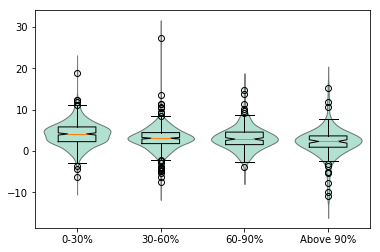

In [22]:
labels = ["0-30%","30-60%","60-90%","Above 90%"]
dat = [np.array(RR.dRGDP[RR.dgcat==x]) for x in labels]
print sm.graphics.violinplot(dat, labels=labels)

Figure(432x288)


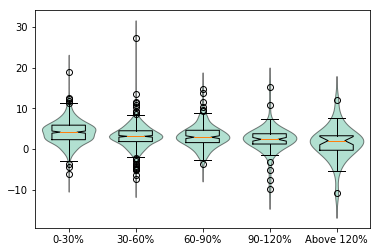

In [23]:
labels = ["0-30%","30-60%","60-90%","90-120%","Above 120%"]
dat = [np.array(RR.dRGDP[RR.dgcat2==x]) for x in labels]
print sm.graphics.violinplot(dat, labels=labels)

## Country-Year average by debtgdp for more recent samples


In [24]:
years = range(1950, 2001, 10)
f = lambda x: (x, RR[RR.Year >= x].dRGDP.groupby(RR[RR.Year >= x].dgcat).mean())
[f(x) for x in years]

[(1950, dgcat
  0-30%        4.135295
  30-60%       2.980839
  60-90%       3.100982
  Above 90%    2.121852
  Name: dRGDP, dtype: float64), (1960, dgcat
  0-30%        3.895619
  30-60%       2.909601
  60-90%       2.779663
  Above 90%    2.074064
  Name: dRGDP, dtype: float64), (1970, dgcat
  0-30%        3.145224
  30-60%       2.644951
  60-90%       2.559289
  Above 90%    1.959229
  Name: dRGDP, dtype: float64), (1980, dgcat
  0-30%        2.541408
  30-60%       2.451346
  60-90%       2.435681
  Above 90%    1.959229
  Name: dRGDP, dtype: float64), (1990, dgcat
  0-30%        2.669334
  30-60%       2.403622
  60-90%       2.457587
  Above 90%    1.823201
  Name: dRGDP, dtype: float64), (2000, dgcat
  0-30%        2.747593
  30-60%       1.881735
  60-90%       1.290506
  Above 90%    1.745087
  Name: dRGDP, dtype: float64)]

# Lagged dependent variable

In [25]:
RR['dRGDP_lag'] = RR.dRGDP.groupby(RR.Country).apply(lambda x: x.shift())
y,X = patsy.dmatrices('dRGDP ~ dgcat + dRGDP_lag', data=RR[['dRGDP', 'dgcat', 'dRGDP_lag']].dropna())
print sm.OLS(y,X).fit().summary()

                            OLS Regression Results                            
Dep. Variable:                  dRGDP   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     63.84
Date:                Wed, 18 Mar 2020   Prob (F-statistic):           8.90e-49
Time:                        14:01:52   Log-Likelihood:                -2723.0
No. Observations:                1155   AIC:                             5456.
Df Residuals:                    1150   BIC:                             5481.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.5045      0

# Fixed effects

In [26]:
y,X = patsy.dmatrices('dRGDP ~ dgcat + dRGDP_lag + Country', data=RR[['dRGDP', 'dgcat', 'dRGDP_lag', 'Country']].dropna())
print sm.OLS(y,X).fit().summary()

                            OLS Regression Results                            
Dep. Variable:                  dRGDP   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     11.89
Date:                Wed, 18 Mar 2020   Prob (F-statistic):           1.84e-39
Time:                        14:01:52   Log-Likelihood:                -2713.7
No. Observations:                1155   AIC:                             5475.
Df Residuals:                    1131   BIC:                             5597.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  2